In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('Case #2 - USC Recruiting Strategy Case - DATA - sept 2018.xlsx', index_col = 0)
df.head()

,application term,degree posted,application received date,file status completed date,decision date,application cleaned date,deposit received date,department,undergraduate gpa,self reported gpa,...,ready for director review,follow up required,90041_mi,91601_mi,92122_mi,94607_mi,account id,last 60/90 gpa,graduate gpa,temperature
opportunity id,,,,,,,,,,,,,,,,,,,,,
006a000000ys35ZAAQ,Fall 2013,NaN,2013-01-07,2013-02-12,2013-04-03,2013-05-14,NaT,NaN,0.00,NaN,...,False,False,26.135814,27.001180,91.506402,356.534872,001a000001Hv8cmAAB,0.0,NaN,NaN
006a000000ys34TAAQ,Fall 2013,2010-05-21 00:00:00,2013-01-11,2013-01-29,2013-04-03,2013-05-14,2013-04-23,NaN,0.00,NaN,...,False,False,8.607256,18.507157,100.492801,348.467633,001a000001Hv8beAAB,0.0,NaN,NaN
006a000000zHwSbAAK,Fall 2013,2007-01-05 00:00:00,2013-03-15,2013-05-13,2013-06-06,2013-04-18,NaT,NaN,2.00,NaN,...,False,False,14.112139,17.312897,96.109994,351.040530,001a000001J4NikAAF,2.2,NaN,NaN
006a000000zHwOIAA0,Fall 2013,NaN,2013-03-14,2013-03-14,2013-04-24,2013-04-23,NaT,NaN,0.00,NaN,...,False,False,8.872769,10.958503,102.041263,345.138712,001a000001J4NeYAAV,0.0,NaN,NaN
006a000000zHwQgAAK,Fall 2013,2011-01-31 00:00:00,2013-03-11,2013-07-09,2013-07-09,2013-03-25,NaT,NaN,2.01,NaN,...,False,False,30.434642,36.394601,76.712759,370.439711,001a000001J4NgvAAF,NaN,NaN,NaN


In [4]:
df.decision.unique()

array(['2nd Tier Admit', 'Deny', 'Exit', 'Wait List', 'Exit to VAC',
       '3rd Tier Admit', nan, '1st Tier Admit', 'Interview Required'],
      dtype=object)

In [5]:
df.response.unique()

array(['Withdrawn', 'Confirmed', nan, 'Deferred', 'VAC Switch',
       'Undecided'], dtype=object)

In [3]:
df_byTier = pd.concat([df.groupby(['decision'])[['decision']].count(),
                       df.loc[df.response == 'Confirmed',:].groupby(['decision'])[['decision']].count()], axis=1)
df_byTier.columns = ['decision', 'response']
df_byTier['acceptance_ratio'] = df_byTier.response / df_byTier.decision
df_byTier

,decision,response,acceptance_ratio
1st Tier Admit,1606,716.0,0.445828
2nd Tier Admit,3881,2317.0,0.597011
3rd Tier Admit,233,182.0,0.781116
Deny,328,NaN,NaN
Exit,139,NaN,NaN
Exit to VAC,25,NaN,NaN
Interview Required,5,NaN,NaN
Wait List,12,NaN,NaN


In [7]:
df_f = df.loc[df.decision == '1st Tier Admit',['undergraduate gpa','first review exp','first review sop','first review gpa','first review lor',
                'concentration/department interest','ethnicity','gender', 'first generation', 'response',
                 'response date','date acceptance letter sent','age']]
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1606 entries, 006a000000ys36NAAQ to 006a000001LOiJMAA1
Data columns (total 13 columns):
undergraduate gpa                    1604 non-null float64
first review exp                     1588 non-null float64
first review sop                     1588 non-null float64
first review gpa                     1588 non-null float64
first review lor                     1588 non-null float64
concentration/department interest    1497 non-null object
ethnicity                            1605 non-null object
gender                               1606 non-null object
first generation                     1568 non-null object
response                             1599 non-null object
response date                        1585 non-null datetime64[ns]
date acceptance letter sent          1521 non-null datetime64[ns]
age                                  1605 non-null float64
dtypes: datetime64[ns](2), float64(6), object(5)
memory usage: 175.7+ KB


In [13]:
df_f.groupby(['first generation'])[['first generation']].count()

,first generation
first generation,
No,925
Yes,643


In [16]:
df_f['concentration/department interest'].unique()

array(['Mental Health', 'Family and Children', 'COPA', 'Health',
       'Social Work and Business', nan,
       'CYF Children, Youth, and Families',
       'SCI Social Change and Innovation',
       'COBI Community, Organization and Business Innovation',
       'Family & Children', 'None of the above:  I am not eligible fo',
       'Workplace', 'CYF Children ,Youth and Families',
       'AMHW Adult Mental Health and Wellness',
       'COBI Community, Organization and Busines',
       'Social Work Graduate Fair-USC, Los Angel',
       'COBI Community, Organization and Business',
       'AHA Adults and Healthy Aging', 'N'], dtype=object)

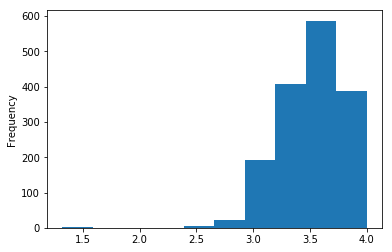

In [6]:
df_f['undergraduate gpa'].plot(kind='hist')

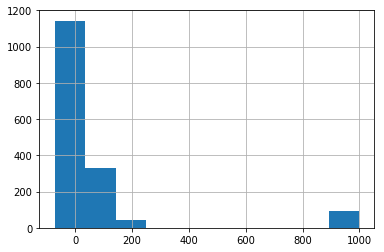

In [21]:
#df_f['lead_time'] = 
(df_f['response date'] - df_f['date acceptance letter sent']).apply(lambda x: x.days if x is not pd.NaT else 999).hist()

In [90]:
df_f.head()

,undergraduate gpa,first review exp,first review sop,first review gpa,first review lor,concentration/department interest,ethnicity,gender,first generation,response,response date,date acceptance letter sent,age
opportunity id,,,,,,,,,,,,,
006a000000ys36NAAQ,2.41,5.0,5.0,5.0,4.0,Mental Health,Unknown,Female,Yes,Confirmed,2013-04-08,2013-03-22,33.0
006a000000ys326AAA,2.78,5.0,5.0,3.0,5.0,Mental Health,Caucasian,Female,Yes,Withdrawn,2013-07-12,2013-03-29,56.0
006a000000ys2xEAAQ,2.81,5.0,5.0,3.0,5.0,Family and Children,Asian/Pacific Islander,Female,No,Withdrawn,2013-04-17,2013-04-05,29.0
006a000000ys34CAAQ,2.86,5.0,5.0,3.0,5.0,Family and Children,Native American,Female,No,Confirmed,2013-04-06,2013-04-05,34.0
006a000000zHwSiAAK,2.90,NaN,NaN,NaN,NaN,Family and Children,African American,Female,Yes,Confirmed,2013-04-08,2013-03-15,34.0


In [8]:
df_f = df_f.dropna(subset = ['response date', 'date acceptance letter sent'])
df_f.response.unique()

array(['Confirmed', 'Withdrawn', 'Deferred', 'VAC Switch'], dtype=object)

In [9]:
def date_diff(row):
    rd = row['response date']
    ad = row['date acceptance letter sent']
    return (rd - ad).days
df_f['date_diff'] = df_f.apply(date_diff, axis=1)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e24e860>,
      dtype=object)

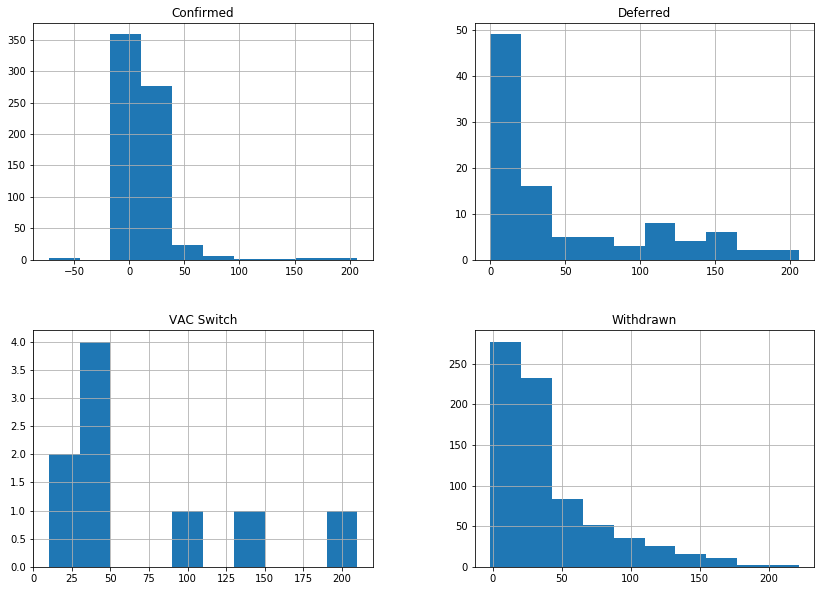

In [84]:
df_f.reset_index().loc[:,['response', 'date_diff']].pivot(columns='response', values = 'date_diff').hist(figsize=(14,10))

In [10]:
sorted(df_f['concentration/department interest'].unique()[pd.notna(df_f['concentration/department interest'].unique())])

['AHA Adults and Healthy Aging',
 'AMHW Adult Mental Health and Wellness',
 'COBI Community, Organization and Busines',
 'COBI Community, Organization and Business',
 'COBI Community, Organization and Business Innovation',
 'COPA',
 'CYF Children ,Youth and Families',
 'CYF Children, Youth, and Families',
 'Family & Children',
 'Family and Children',
 'Health',
 'Mental Health',
 'N',
 'None of the above:  I am not eligible fo',
 'SCI Social Change and Innovation',
 'Social Work Graduate Fair-USC, Los Angel',
 'Social Work and Business',
 'Workplace']

In [11]:
def clean_department(x):
    if x is np.nan:
        return 'Others'
    elif 'Adult' in x or 'Health' in x:
        return 'AMHW'
    elif 'Children' in x:
        return 'CYF'
    elif 'Social' in x or 'Organization' in x or 'COPA' in x:
        return 'SCI'
    else:
        return 'Others'
    
df_f['concentration/department interest'] = df_f['concentration/department interest'].apply(clean_department)

In [166]:
sorted(df_f['concentration/department interest'].unique()[~pd.isna(df_f['concentration/department interest'].unique())])

['AMHW', 'CYF', 'Others', 'SCI']

In [12]:
values = {'undergraduate gpa': df_f['undergraduate gpa'].mean(),
          'first review exp': df_f['first review exp'].mean(),
          'first review sop': df_f['first review sop'].mean(),
          'first review gpa': df_f['first review gpa'].mean(),
          'first review lor': df_f['first review lor'].mean()
         }
df_f = df_f.fillna(value=values)

In [13]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1516 entries, 006a000000ys36NAAQ to 006a000001LOiJMAA1
Data columns (total 14 columns):
undergraduate gpa                    1516 non-null float64
first review exp                     1516 non-null float64
first review sop                     1516 non-null float64
first review gpa                     1516 non-null float64
first review lor                     1516 non-null float64
concentration/department interest    1516 non-null object
ethnicity                            1516 non-null object
gender                               1516 non-null object
first generation                     1478 non-null object
response                             1516 non-null object
response date                        1516 non-null datetime64[ns]
date acceptance letter sent          1516 non-null datetime64[ns]
age                                  1516 non-null float64
date_diff                            1516 non-null int64
dtypes: datetime64[ns](2), float64

In [169]:
df_f['first generation'].unique()

array(['Yes', 'No', nan], dtype=object)

In [14]:
prob = df_f.loc[:,['first generation', 'response']].groupby(['first generation'])['response'].count()[1]/pd.notna(df_f['first generation']).sum()

def rand_firstgen(x):
    if x is np.nan:
        return np.random.binomial(1,prob)
    elif x == 'Yes':
        return 1
    else:
        return 0
    
    
df_f['first generation'] = df_f['first generation'].apply(rand_firstgen)


In [16]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1516 entries, 006a000000ys36NAAQ to 006a000001LOiJMAA1
Data columns (total 14 columns):
undergraduate gpa                    1516 non-null float64
first review exp                     1516 non-null float64
first review sop                     1516 non-null float64
first review gpa                     1516 non-null float64
first review lor                     1516 non-null float64
concentration/department interest    1516 non-null object
ethnicity                            1516 non-null object
gender                               1516 non-null object
first generation                     1516 non-null int64
response                             1516 non-null object
response date                        1516 non-null datetime64[ns]
date acceptance letter sent          1516 non-null datetime64[ns]
age                                  1516 non-null float64
date_diff                            1516 non-null int64
dtypes: datetime64[ns](2), float64(

In [172]:
df_f.gender.unique()

array(['Female', 'Male'], dtype=object)

In [19]:
def gender_to_binary(x):
    if 'female' in x.lower():
        return 0
    else:
        return 1
    
def response_to_binary(x):
    if 'withdraw' in x.lower():
        return 0
    else:
        return 1

df_f['gender'] = df_f['gender'].apply(gender_to_binary)
df_f['y'] = df_f['response'].apply(response_to_binary)
df_f['date_diff'] = df_f['date_diff'].astype(float)

In [20]:
pd.get_dummies(df_f, columns=['concentration/department interest','ethnicity']).info()

<class 'pandas.core.frame.DataFrame'>
Index: 1516 entries, 006a000000ys36NAAQ to 006a000001LOiJMAA1
Data columns (total 25 columns):
undergraduate gpa                           1516 non-null float64
first review exp                            1516 non-null float64
first review sop                            1516 non-null float64
first review gpa                            1516 non-null float64
first review lor                            1516 non-null float64
gender                                      1516 non-null int64
first generation                            1516 non-null int64
response                                    1516 non-null object
response date                               1516 non-null datetime64[ns]
date acceptance letter sent                 1516 non-null datetime64[ns]
age                                         1516 non-null float64
date_diff                                   1516 non-null float64
y                                           1516 non-null int64
co

In [ ]:
pd.get_dummies(df_f, columns=['concentration/department interest','ethnicity']).drop(['response',
                                                                                          'response date',
                                                                                          'date acceptance letter sent',
                                                                                          'y'
                                                                                         ],axis=1)

In [22]:
X = pd.get_dummies(df_f, columns=['concentration/department interest','ethnicity']).drop(['response',
                                                                                          'response date',
                                                                                          'date acceptance letter sent',
                                                                                          'y'
                                                                                         ],axis=1).values
y = df_f.y.values

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

steps = [('scaler', StandardScaler()),
         ('logreg', LogisticRegression())]

pipeline = Pipeline(steps)
    
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_train)
print("Training\n", confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

y_pred = pipeline.predict(X_test)

print("Testing\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training
 [[297 154]
 [119 339]]
             precision    recall  f1-score   support

          0       0.71      0.66      0.69       451
          1       0.69      0.74      0.71       458

avg / total       0.70      0.70      0.70       909

Testing
 [[176 109]
 [ 73 249]]
             precision    recall  f1-score   support

          0       0.71      0.62      0.66       285
          1       0.70      0.77      0.73       322

avg / total       0.70      0.70      0.70       607



In [24]:
from sklearn.ensemble import RandomForestClassifier

steps = [('scaler', StandardScaler()),
         ('forest', RandomForestClassifier())]

pipeline = Pipeline(steps)
    
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_train)
print("Training\n", confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

y_pred = pipeline.predict(X_test)

print("Testing\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training
 [[447   4]
 [ 11 447]]
             precision    recall  f1-score   support

          0       0.98      0.99      0.98       451
          1       0.99      0.98      0.98       458

avg / total       0.98      0.98      0.98       909

Testing
 [[222  63]
 [ 89 233]]
             precision    recall  f1-score   support

          0       0.71      0.78      0.74       285
          1       0.79      0.72      0.75       322

avg / total       0.75      0.75      0.75       607



In [189]:
print(df_f.groupby(['y'])['y'].count())
780/(1516)

y
0    736
1    780
Name: y, dtype: int64


0.5145118733509235

In [202]:
df_f.ethnicity.unique()

array(['Unknown', 'Caucasian', 'Asian/Pacific Islander',
       'Native American', 'African American', 'Latino/a', 'Multi-Ethnic',
       'Arab/Middle Eastern'], dtype=object)

In [204]:
df_f.ethnicity = df_f.ethnicity.astype('category')
df_f.gender = df_f.gender.astype('category')
df_f['first generation'] = df_f['first generation'].astype('category')
df_f['concentration/department interest'] = df_f['concentration/department interest'].astype('category')

X_rCV = df_f.drop(['response',
           'response date',
           'date acceptance letter sent',
           'y'], axis=1)
y_rCV = df_f.y

print(X_rCV.info())
X_rCV.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1516 entries, 006a000000ys36NAAQ to 006a000001LOiJMAA1
Data columns (total 11 columns):
undergraduate gpa                    1516 non-null float64
first review exp                     1516 non-null float64
first review sop                     1516 non-null float64
first review gpa                     1516 non-null float64
first review lor                     1516 non-null float64
concentration/department interest    1516 non-null category
ethnicity                            1516 non-null category
gender                               1516 non-null category
first generation                     1516 non-null category
age                                  1516 non-null float64
date_diff                            1516 non-null float64
dtypes: category(4), float64(7)
memory usage: 141.4+ KB
None


,undergraduate gpa,first review exp,first review sop,first review gpa,first review lor,concentration/department interest,ethnicity,gender,first generation,age,date_diff
opportunity id,,,,,,,,,,,
006a000000ys36NAAQ,2.41,5.000000,5.000000,5.000000,4.000000,AMHW,Unknown,0,1,33.0,17.0
006a000000ys326AAA,2.78,5.000000,5.000000,3.000000,5.000000,AMHW,Caucasian,0,1,56.0,105.0
006a000000ys2xEAAQ,2.81,5.000000,5.000000,3.000000,5.000000,CYF,Asian/Pacific Islander,0,0,29.0,12.0
006a000000ys34CAAQ,2.86,5.000000,5.000000,3.000000,5.000000,CYF,Native American,0,0,34.0,1.0
006a000000zHwSiAAK,2.90,4.000664,4.656271,4.573324,4.452555,CYF,African American,0,1,34.0,24.0


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [5,7,10]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
param_grid = {'forest__n_estimators': n_estimators,
               'forest__max_features': max_features,
               'forest__max_depth': max_depth,
               'forest__min_samples_split': min_samples_split,
               'forest__min_samples_leaf': min_samples_leaf,
               'forest__bootstrap': bootstrap}

steps = [('scaler', StandardScaler()),
         ('forest', RandomForestClassifier())]

pipeline = Pipeline(steps)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
randomforest_cv = GridSearchCV(pipeline, param_grid, scoring='f1', cv=cv, verbose=2, n_jobs=5)

randomforest_cv.fit(X_train, y_train)
print(randomforest_cv.best_params_)

In [25]:
pipeline.set_params(forest__bootstrap= True,
                    forest__max_depth= 7,
                    forest__max_features= 'sqrt',
                    forest__min_samples_leaf= 1,
                    forest__min_samples_split= 10,
                    forest__n_estimators= 200).fit(X_train, y_train)
y_pred = pipeline.predict(X_train)
print("Training\n", confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

y_pred = pipeline.predict(X_test)

print("Testing\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training
 [[371  80]
 [ 90 368]]
             precision    recall  f1-score   support

          0       0.80      0.82      0.81       451
          1       0.82      0.80      0.81       458

avg / total       0.81      0.81      0.81       909

Testing
 [[230  55]
 [ 69 253]]
             precision    recall  f1-score   support

          0       0.77      0.81      0.79       285
          1       0.82      0.79      0.80       322

avg / total       0.80      0.80      0.80       607



In [27]:
y_pred_prob

array([[0.17638238, 0.82361762],
       [0.75553319, 0.24446681],
       [0.76101852, 0.23898148],
       ...,
       [0.26665958, 0.73334042],
       [0.29248042, 0.70751958],
       [0.26504571, 0.73495429]])

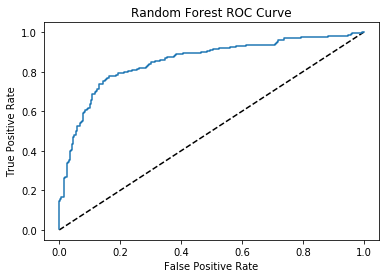

AUC: 0.8535904979840906


In [28]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score

y_pred_prob = pipeline.predict_proba(X_test)
y_pred_prob_positive = y_pred_prob[:,1]

fpr, tpr, threshold = roc_curve(y_test, y_pred_prob_positive)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.show()

print('AUC: {}'.format(roc_auc_score(y_test, y_pred_prob_positive)))

In [30]:
pd.DataFrame(y_pred_prob).to_excel('prediction_prob.xlsx')